## Importing Required Libraries

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading data

In [2]:
curr_dir=os.getcwd()
data_path=os.path.join(curr_dir,'Dataset/Clean_data.csv')

In [3]:
data=pd.read_csv(data_path)
data.shape

(4706, 7)

In [4]:
data.head()

,Job title,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain,Impact_Level
0,Communications Manager,0.98,365,2546,0.143362,Communication & PR,Revolutionary
1,Data Collector,0.95,299,2148,0.139199,Data & IT,Revolutionary
2,Data Entry,0.95,325,2278,0.142669,Administrative & Clerical,Revolutionary
3,Mail Clerk,0.95,193,1366,0.141288,Administrative & Clerical,Revolutionary
4,Compliance Officer,0.92,194,1369,0.141709,Medical & Healthcare,Revolutionary


# Exploratory Data Analysis

In [5]:
data['Domain'].unique()

array(['Communication & PR', 'Data & IT', 'Administrative & Clerical',
       'Medical & Healthcare', 'Leadership & Strategy', 'Law Enforcement',
       'Construction', 'Sales & Marketing', 'Hospitality',
       'Supply Chain & Logistics'], dtype=object)

In [6]:
data['Impact_Level'].unique()

array(['Revolutionary', 'Significant', 'Moderate', 'Minor', 'Negligible'],
      dtype=object)

In [7]:
domain_impact=data.groupby('Domain')['AI Impact'].mean().sort_values(ascending=False)
domain_impact

Domain
Data & IT                    0.421101
Law Enforcement              0.343919
Sales & Marketing            0.332720
Supply Chain & Logistics     0.323419
Administrative & Clerical    0.312176
Construction                 0.279802
Medical & Healthcare         0.266571
Leadership & Strategy        0.254494
Hospitality                  0.246232
Communication & PR           0.224908
Name: AI Impact, dtype: float64

### Univariate Analysis

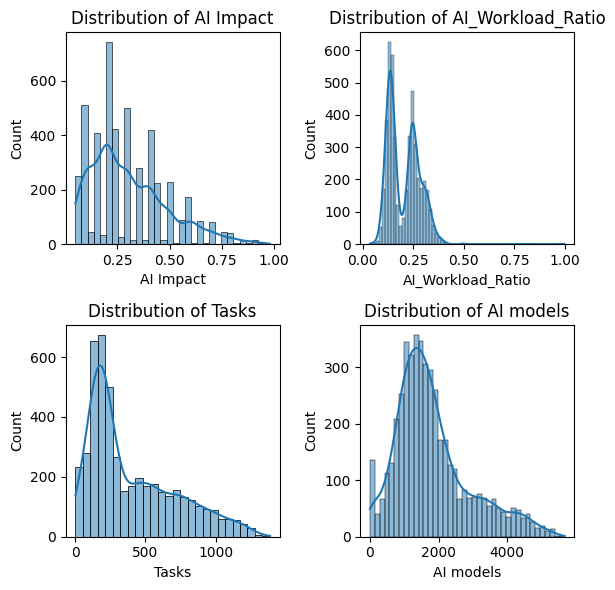

In [8]:
numerical_features = ['AI Impact', 'AI_Workload_Ratio', 'Tasks', 'AI models']

plt.figure(figsize=(6, 6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

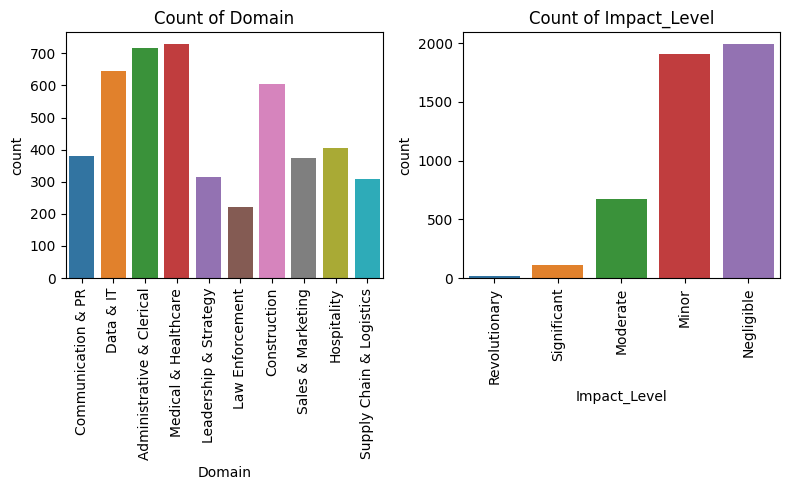

In [9]:
categorical_features = ['Domain', 'Impact_Level']

plt.figure(figsize=(8, 5))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 2, i)
    sns.countplot(x=feature, data=data)
    plt.title(f'Count of {feature}')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Bivariate Analysis

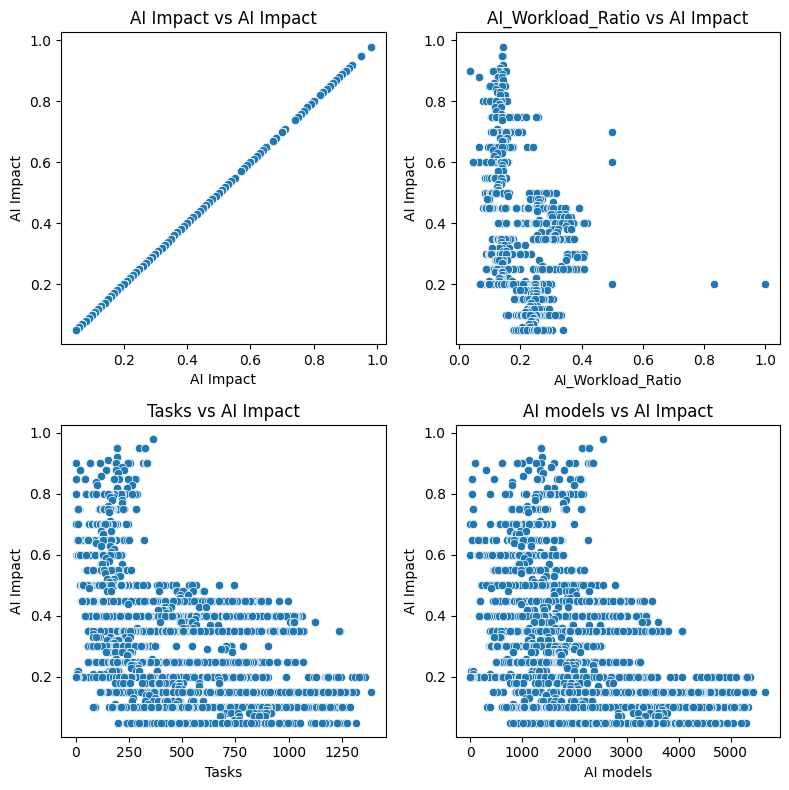

In [10]:
plt.figure(figsize=(8, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=feature, y='AI Impact', data=data)
    plt.title(f'{feature} vs AI Impact')
plt.tight_layout()
plt.show()

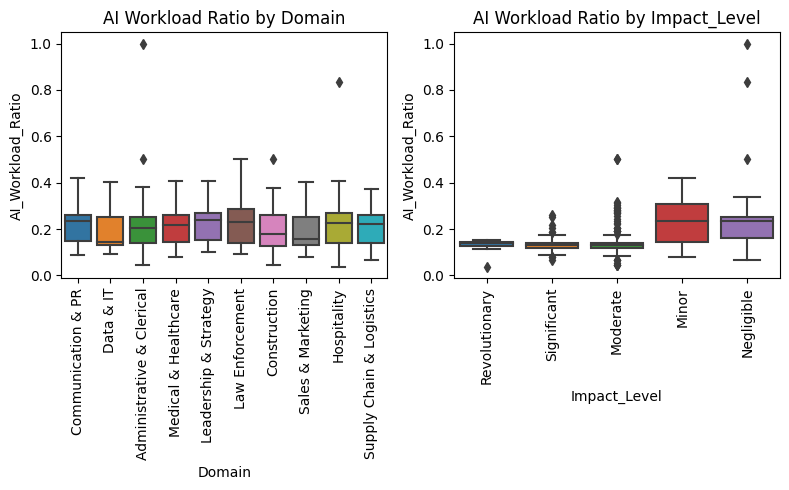

In [11]:
plt.figure(figsize=(8, 5))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x=feature, y='AI_Workload_Ratio', data=data)
    plt.title(f'AI Workload Ratio by {feature}')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

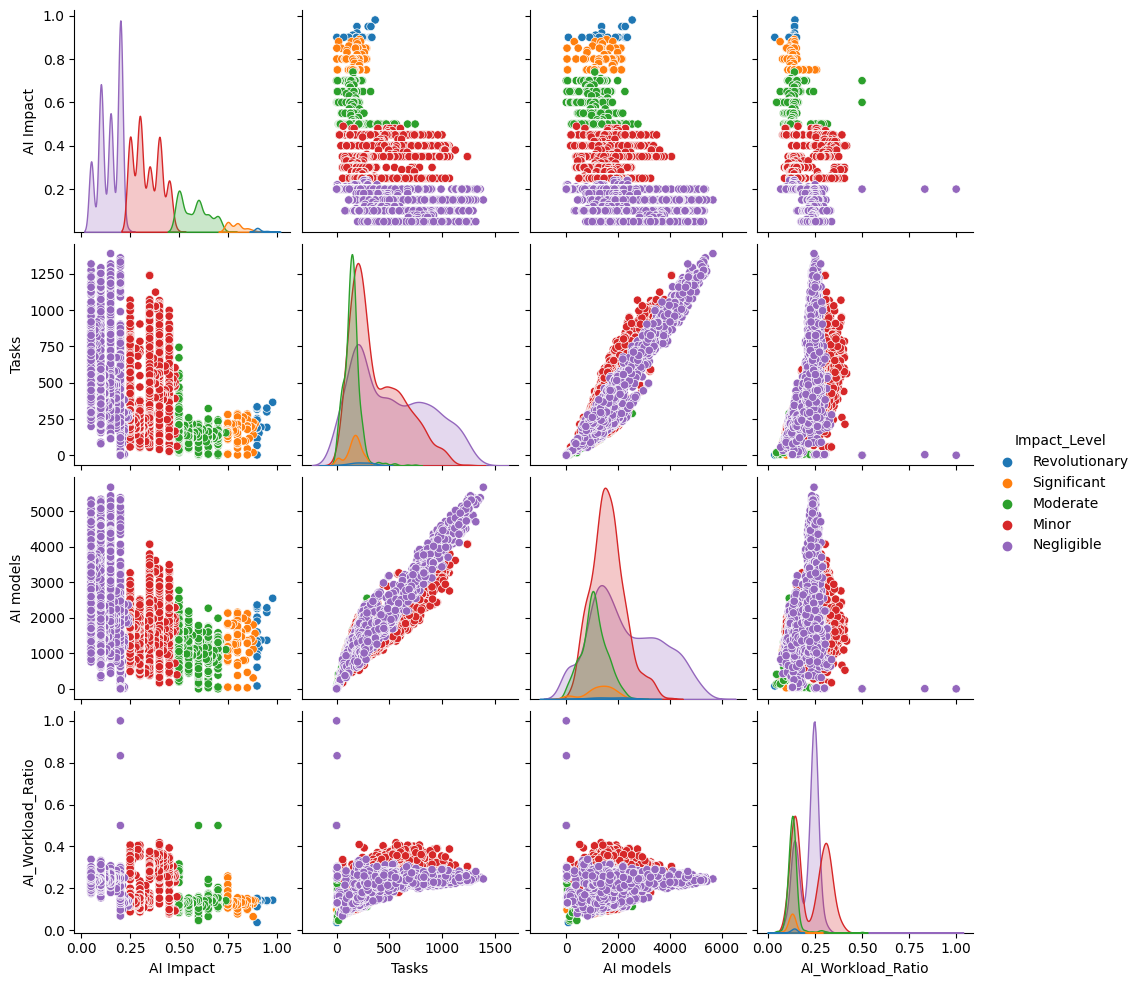

In [12]:
sns.pairplot(data, hue='Impact_Level', diag_kind='kde')
plt.show()

## Correlation

In [13]:
numeric_df = data.select_dtypes(include=[np.number])
corr=numeric_df.corr(method='pearson')
corr

,AI Impact,Tasks,AI models,AI_Workload_Ratio
AI Impact,1.000000,-0.419760,-0.413176,-0.287871
Tasks,-0.419760,1.000000,0.928350,0.631305
AI models,-0.413176,0.928350,1.000000,0.346893
AI_Workload_Ratio,-0.287871,0.631305,0.346893,1.000000


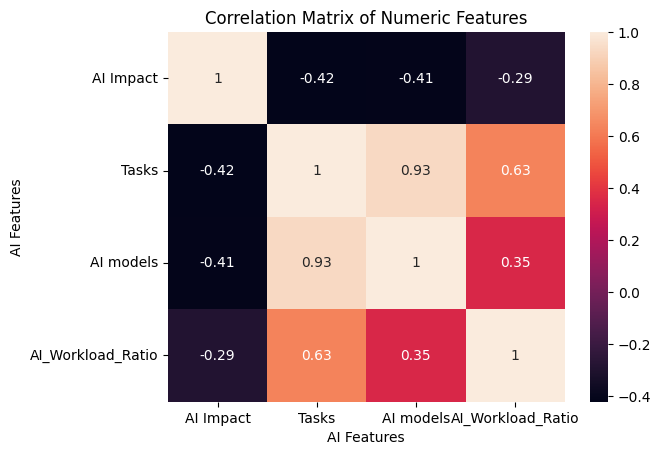

In [14]:
numeric_df = data.select_dtypes(include=[np.number])
corr=numeric_df.corr(method='pearson')
sns.heatmap(corr, annot = True)
plt.title('Correlation Matrix of Numeric Features')
plt.xlabel('AI Features')
plt.ylabel('AI Features')
plt.show()

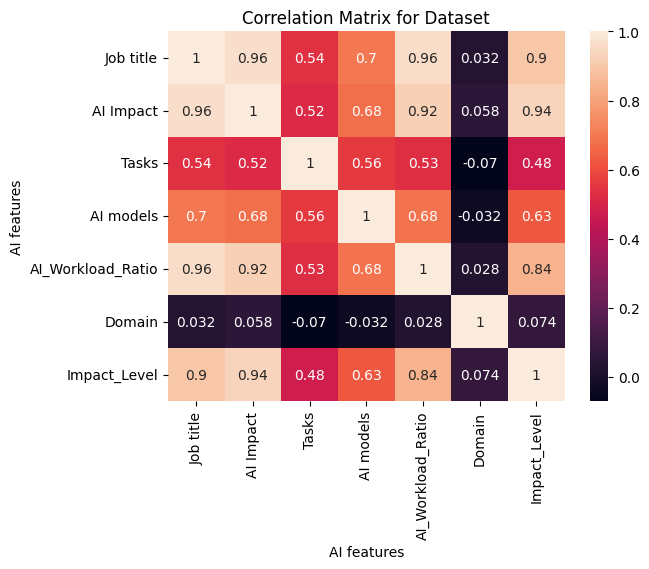

In [15]:
correlation_matrix = data.apply(lambda x: x.factorize()[0]).corr(method='pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation Matrix for Dataset")
plt.xlabel("AI features")
plt.ylabel("AI features")
plt.show()

## Feature Engineering

In [16]:
data['Log_Tasks'] = np.log1p(data['Tasks'])
data['Log_Tasks']

0       5.902633
1       5.703782
2       5.786897
3       5.267858
4       5.273000
          ...   
4701    6.532334
4702    6.322565
4703    7.183112
4704    6.566672
4705    6.716595
Name: Log_Tasks, Length: 4706, dtype: float64

In [17]:
data['Log_Models'] = np.log1p(data['AI models'])
data['Log_Models']

0       7.842671
1       7.672758
2       7.731492
3       7.220374
4       7.222566
          ...   
4701    7.937017
4702    7.699389
4703    8.454466
4704    7.861342
4705    8.088562
Name: Log_Models, Length: 4706, dtype: float64

## Predictive Modelling

In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True)
poly_features = poly.fit_transform(data[['Tasks', 'AI models']])
poly_df = pd.DataFrame(poly_features, columns=['1', 'Tasks', 'AI models', 'Tasks_AI models'])
data = pd.concat([data, poly_df], axis=1)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
X = data[['Tasks', 'AI models', 'AI_Workload_Ratio', 'Log_Tasks', 'Log_Models', 'Tasks_AI models']]
y = data['Impact_Level']
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("Accuracy Score:", accuracy_score(y_test, predictions))

               precision    recall  f1-score   support

        Minor       0.71      0.73      0.72       580
     Moderate       0.59      0.60      0.60       210
   Negligible       0.77      0.76      0.77       580
Revolutionary       0.50      0.20      0.29         5
  Significant       0.38      0.27      0.32        37

     accuracy                           0.71      1412
    macro avg       0.59      0.51      0.54      1412
 weighted avg       0.71      0.71      0.71      1412

Confusion Matrix:
 [[421  45 107   1   6]
 [ 57 127  20   0   6]
 [ 99  34 443   0   4]
 [  1   1   2   1   0]
 [ 16   8   3   0  10]]
Accuracy Score: 0.7096317280453258


## Insights & Matrices

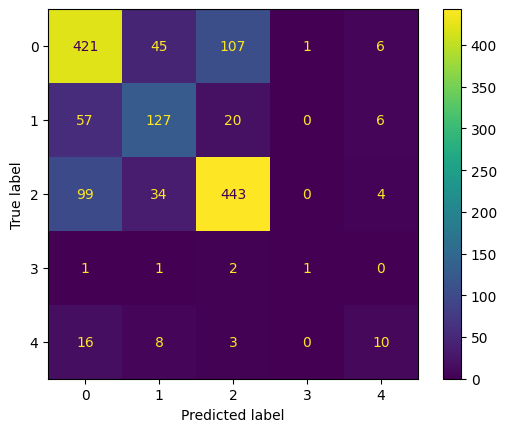

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred_class = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

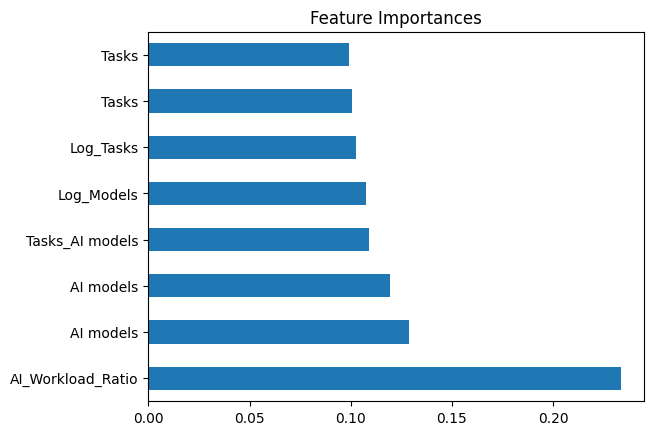

In [21]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importances')
plt.show()